We **simulate** a simple dataset to perform linear classification.

(150, 2)


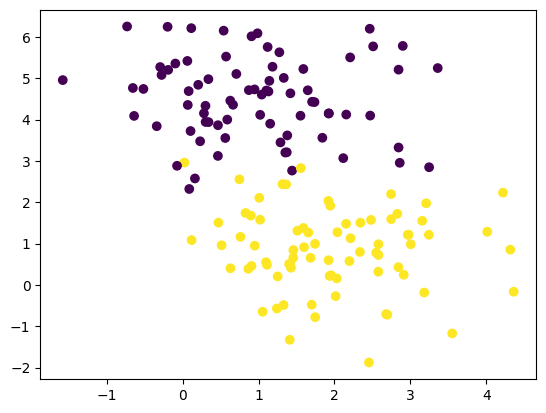

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
X,y = datasets.make_blobs(n_samples = 150, centers = 2, n_features = 2, random_state = 0)
print(X.shape) #100 observations, 2 features
plt.scatter(X[:,0], X[:,1], c=y)

Standard train/test split:

In [ ]:
from sklearn.model_selection import train_test_split

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 34)


Ready to perform linear classification.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Remark: in LR an intercept term equal to one is introduced by default. However the corresponding weight is NOT penalized by all solvers (...) liblinear does
lr = LogisticRegression(C=1., solver = 'liblinear') #  C is the inverse of the penalty strength; default solver lbfgs using a "faster" estimate of the Heissian
nb = GaussianNB()

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
y_hat_lr = lr.predict(X_test)
y_hat_nb = nb.predict(X_test)

How to check how well it worked?

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy (LR): {} - Accuracy (NB): {}'.format(accuracy_score(y_hat_lr, y_test), accuracy_score(y_hat_nb, y_test)))

Accuracy (LR): 0.9666666666666667 - Accuracy (NB): 0.9


A plot might also be helpful:

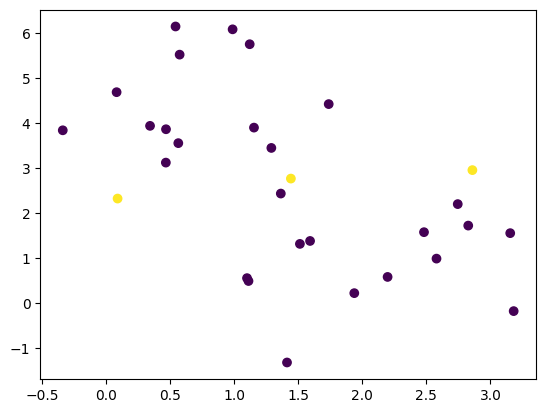

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c = (y_test != y_hat_nb))#  c = (y_test != y_hat_lr)) to check where LR failed